In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': 
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid')
    rc('font', family=font_name)

- 전처리된 파일 불러오기

In [319]:
p21=pd.read_excel('data/pub21_전처리(완).xlsx')
p20=pd.read_excel('data/pub20_전처리(완).xlsx')
p19=pd.read_excel('data/pub19_전처리(완).xlsx')
p18=pd.read_excel('data/pub18_전처리(완).xlsx')
p17=pd.read_excel('data/pub17_전처리(완).xlsx')

## 분석 항목

### 2. 공공도서관의 운영 실태 분석

#### 1)공공도서관의 기초 운영 실태 파악
* 17~21년 동안의 지역별 도서관 수,
* 연간 이용자 수 조사

In [321]:
#결측치 유무 확인
p21.isnull().sum().sum()

0

1) 21년 동안 공공도서관 방문자 수를 지역별로 분류

In [322]:
g21=p21['도서관_방문자수'].groupby(p21['지역'])

In [323]:
#21년 지역별 도서관 개수 파악
g21.size()

지역
강원     60
경기    300
경남     76
경북     70
광주     24
대구     44
대전     26
부산     49
서울    195
세종     13
울산     19
인천     58
전남     71
전북     64
제주     22
충남     63
충북     54
Name: 도서관_방문자수, dtype: int64

In [324]:
#21년도 지역별 공공도서관 방문자 수 합계
g21.sum()

지역
강원     4527619
경기    42422317
경남     8402980
경북     5378902
광주     3326495
대구     5953083
대전     2703163
부산     7316323
서울    31288730
세종      738250
울산     3285120
인천     7749321
전남     4499951
전북     2970643
제주     1527553
충남     4441942
충북     2406996
Name: 도서관_방문자수, dtype: int64

In [325]:
g20=p20['도서관_방문자수'].groupby(p20['지역'])
g19=p19['도서관_방문자수'].groupby(p19['지역'])
g18=p18['도서관_방문자수'].groupby(p18['지역'])
g17=p17['도서관_방문자수'].groupby(p17['지역'])

In [326]:
#17~21년 지역별 공공도서관 개수 변화(Library CounT)
lct=pd.concat([g17.size(),g18.size(),g19.size(),g20.size(),g21.size()],axis=1)

In [327]:
#지역별 도서관 수 연도구분 칼럼명 추가
lct.columns = ['2017년', '2018년', '2019년','2020년','2021년']

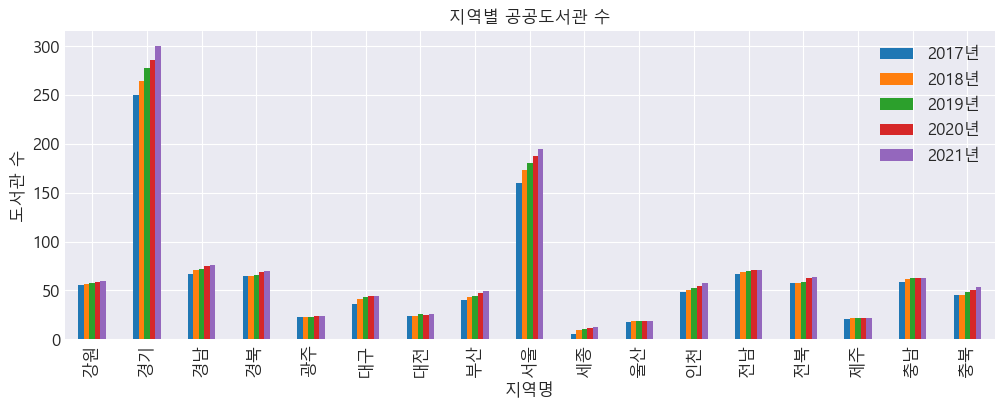

In [328]:
ax = lct.plot(kind='bar', title='지역별 공공도서관 수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('지역명', fontsize=12)   #x축
ax.set_ylabel('도서관 수', fontsize=12)   #y축
ax.legend(['2017년','2018년','2019년','2020년','2021년'], fontsize=12)   #범례

=>지역에 따른 차이는 있으나 전반적으로 시간의 흐름과 비례하게 상승. 인구가 밀집된 수도권 지역이 다른 지역에 비해 월등하게 많은 도서관 보유

* 지역별 연간 도서관 방문자 수 계산

In [330]:
g20.sum()

지역
강원     3094242
경기    25497567
경남     5381424
경북     3973783
광주     2032998
대구     3701332
대전     1920310
부산     5699121
서울    19927153
세종      491500
울산     2689161
인천     4540958
전남     2665692
전북     2205539
제주      920039
충남     2933898
충북     1902331
Name: 도서관_방문자수, dtype: int64

* 17~21년 지역별 공공도서관 방문자수 변화

In [331]:
vct=pd.concat([g17.sum(),g18.sum(),g19.sum(),g20.sum(),g21.sum()],axis=1)

In [332]:
#지역별) 각 데이터에 연도를 칼럼명 추가
vct.columns = ['2017년', '2018년', '2019년','2020년','2021년']

In [333]:
vct2=vct.transpose()

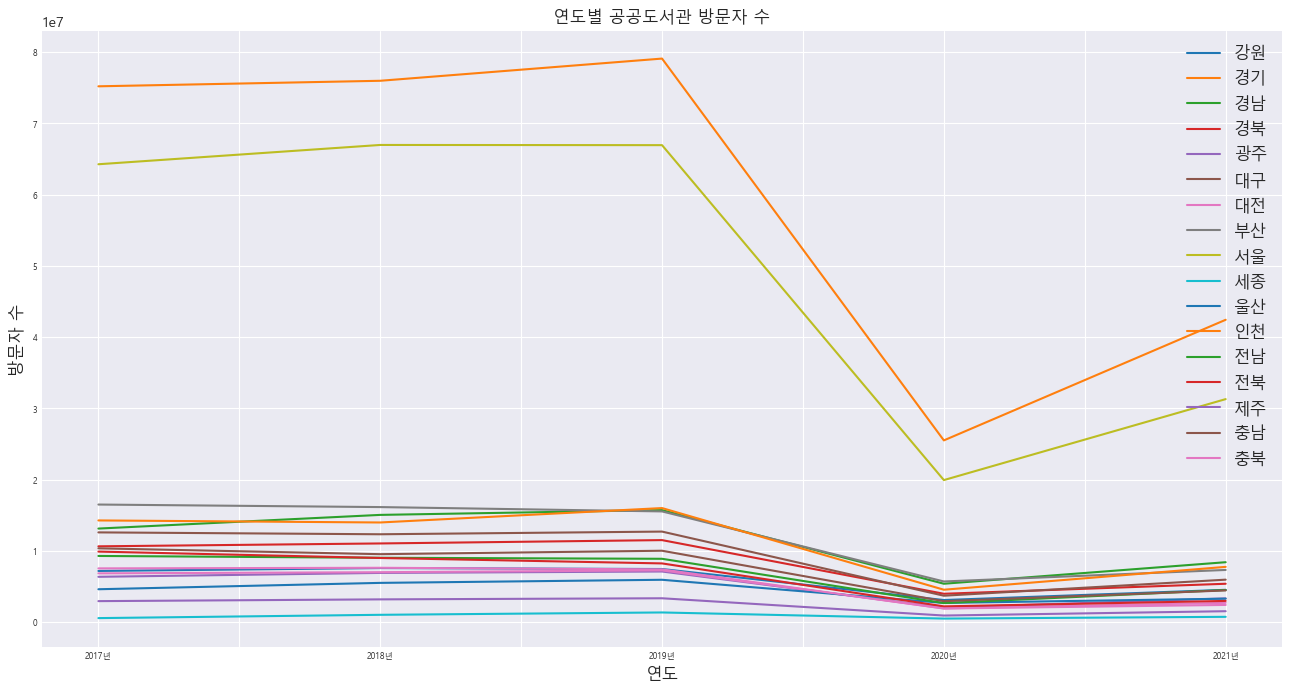

In [334]:
ax = vct2.plot(kind='line', title='연도별 공공도서관 방문자 수', figsize=(16, 8), legend=True, fontsize=6)
ax.set_xlabel('연도', fontsize=12)          # x축 정보 표시
ax.set_ylabel('방문자 수', fontsize=12)     # y축 정보 표시
ax.legend(['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북'], fontsize=12)    # 범례 지정

In [183]:
#분석결과 : 2020코로나 강타와 함께 방문자 수가 대폭 감소했으나 21년에 빠른 회복세를 보임

In [184]:
##2-2이용자분석
#221 연령대별 대여 분석


In [335]:
g21=p21['도서관_방문자수'].groupby(p21['지역'])
g20=p20['도서관_방문자수'].groupby(p20['지역'])
g19=p19['도서관_방문자수'].groupby(p19['지역'])
g18=p18['도서관_방문자수'].groupby(p18['지역'])
g17=p17['도서관_방문자수'].groupby(p17['지역'])

In [336]:
p21.isnull().sum()

Unnamed: 0                0
도서관명                      0
구분                        0
지역                        0
시설_도서관부지면적                0
                         ..
독서프로그램_온라인_정기_강좌_건수       0
독서프로그램_온라인_정기_강좌_참가자수     0
독서프로그램_온라인_1회성_강좌_건수      0
독서프로그램_온라인_1회성_강좌_참가자수    0
도서관총예산                    0
Length: 155, dtype: int64

In [337]:
#인쇄자료대출자수

bb21=p21[['대출자수_인쇄자료_어린이','대출자수_인쇄자료_청소년','대출자수_인쇄자료_성인']]

In [338]:
#21년 나이별 인쇄자료 대출수 합계
e=bb21.sum()

In [339]:
##전자자료대출자수
beb21=p21[['대출자수_전자자료_어린이','대출자수_전자자료_청소년','대출자수_전자자료_성인']]

In [340]:
#21년 나이별 전자자료 대출수 합계
f=beb21.sum()

In [341]:
#편리한concat위해 행이름 통일
e.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']

In [342]:
f.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']

In [343]:
#추출한 값 결합시키기
tbb21=pd.concat([e,f],axis=1)

In [345]:
#21년 나이별 대출자수 합산
tbb21=tbb21.sum(axis=1)

In [346]:
#20계산
bb20=p20[['대출자수_인쇄자료_어린이','대출자수_인쇄자료_청소년','대출자수_인쇄자료_성인']]
beb20=p20[['대출자수_전자자료_어린이','대출자수_전자자료_청소년','대출자수_전자자료_성인']]

In [347]:
e20=bb20.sum()
f20=beb20.sum()

In [348]:
e20.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']
f20.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']

In [349]:
tbb20=pd.concat([e20,f20],axis=1)

In [350]:
tbb20=tbb20.sum(axis=1)

In [351]:
bb19=p19[['대출자수_인쇄자료_어린이','대출자수_인쇄자료_청소년','대출자수_인쇄자료_성인']]
bb18=p18[['대출자수_인쇄자료_어린이','대출자수_인쇄자료_청소년','대출자수_인쇄자료_성인']]
bb17=p17[['대출자수_인쇄자료_어린이','대출자수_인쇄자료_청소년','대출자수_인쇄자료_성인']]

In [352]:
e19=bb19.sum()
e18=bb18.sum()
e17=bb17.sum()

In [353]:
e19.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']
e18.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']
e17.index=['대출자수_어린이','대출자수_청소년','대출자수_성인']

In [354]:
e19

대출자수_어린이    2087641
대출자수_청소년    1112520
대출자수_성인     9716304
dtype: int64

In [355]:
tbb=pd.concat([e17,e18,e19,tbb20,tbb21],axis=1)

In [356]:
#칼럼명 입력
tbb.columns=['2017년','2018년','2019년','2020년','2021년']

In [357]:
tbb

,2017년,2018년,2019년,2020년,2021년
대출자수_어린이,2655506.0,2264249,2087641,3005034,3616690
대출자수_청소년,1383307.0,1150768,1112520,1268111,1385851
대출자수_성인,9922197.0,9623364,9716304,10826786,13393385


In [358]:
tbb2=tbb.transpose()

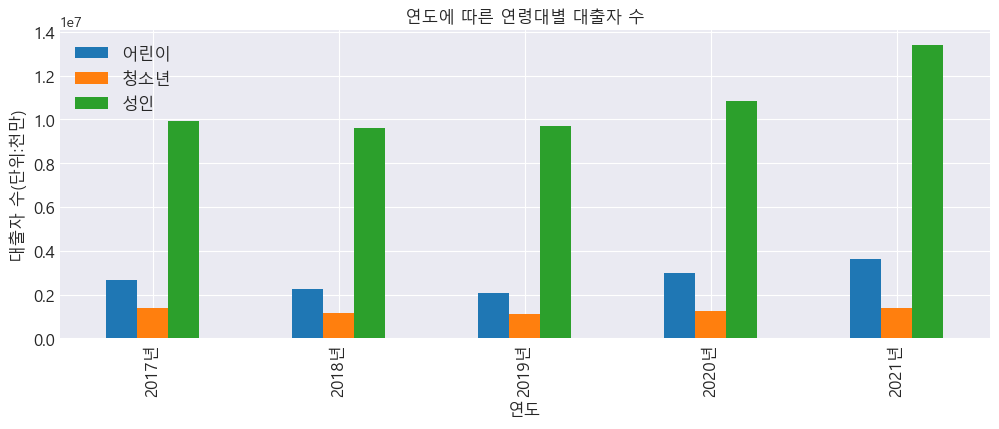

In [359]:
ax = tbb2.plot(kind='bar', title='연도에 따른 연령대별 대출자 수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('연도', fontsize=12)   #x축
ax.set_ylabel('대출자 수(단위:천만)', fontsize=12)   #y축
ax.legend(['어린이','청소년','성인'], fontsize=12)   #범례

* 지역별 도서관 가입자수 파악

In [360]:
#필요 데이터 추출
mr21=p21[['회원등록자수_어린이','회원등록자수_청소년','회원등록자수_성인']]
mr20=p20[['회원등록자수_어린이','회원등록자수_청소년','회원등록자수_성인']]
mr19=p19[['회원등록자수_어린이','회원등록자수_청소년','회원등록자수_성인']]
mr18=p18[['회원등록자수_어린이','회원등록자수_청소년','회원등록자수_성인']]
mr17=p17[['회원등록자수_어린이','회원등록자수_청소년','회원등록자수_성인']]

In [361]:

tmr21=mr21.sum()
tmr20=mr20.sum()
tmr19=mr19.sum()
tmr18=mr18.sum()
tmr17=mr17.sum()

In [362]:
tmr=pd.concat([tmr17,tmr18,tmr19,tmr20,tmr21],axis=1)

In [363]:
tmr.columns=['2017년','2018년','2019년','2020년','2021년']

In [364]:
tmr2=tmr.transpose()

In [365]:
tmr2

,회원등록자수_어린이,회원등록자수_청소년,회원등록자수_성인
2017년,2921933.0,2930099.0,19467151.0
2018년,2614345.0,2762586.0,20380721.0
2019년,2434897.0,2743057.0,21484444.0
2020년,2307151.0,2580578.0,22301215.0
2021년,2251339.0,2392919.0,22728874.0


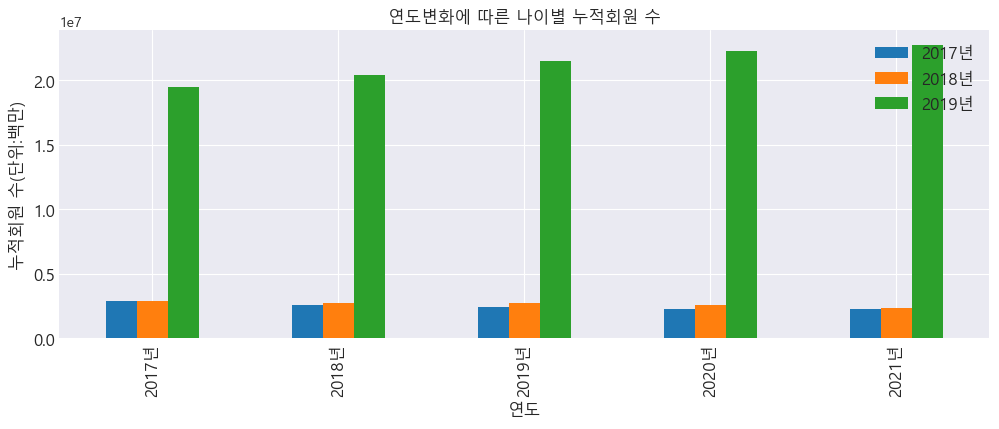

In [366]:
ax = tmr2.plot(kind='bar', title='연도변화에 따른 나이별 회원 수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('연도', fontsize=12)   #x축
ax.set_ylabel('회원 수(단위:백만)', fontsize=12)   #y축
ax.legend(['2017년','2018년','2019년','2020년','2021년'], fontsize=12)   #범례

In [367]:
#필요 데이터 추출
tb21=p21[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','전자자료_전자저널','전자자료_전자도서','전자자료_오디오북','전자자료_기타','연속간행물_국내','연속간행물_국외']]
tb20=p20[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','전자자료_전자저널','전자자료_전자도서','전자자료_오디오북','전자자료_기타','연속간행물_국내','연속간행물_국외']]
tb19=p19[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','전자자료_전자저널','전자자료_전자도서','전자자료_기타','연속간행물_국내','연속간행물_국외']]
tb18=p18[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','전자자료_전자저널','전자자료_전자도서','전자자료_기타','연속간행물_국내','연속간행물_국외']]
tb17=p17[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','전자자료_전자저널','전자자료_전자도서','전자자료_기타','연속간행물_국내','연속간행물_국외']]

In [368]:
#연도별 합계 정리
ptb21=tb21.sum(axis=1)
ptb20=tb20.sum(axis=1)
ptb19=tb19.sum(axis=1)
ptb18=tb18.sum(axis=1)
ptb17=tb17.sum(axis=1)

In [369]:
#보유도서 수를 데이터프레임에 추가
p21=pd.concat([p21, ptb21], axis=1)
p20=pd.concat([p20, ptb20], axis=1)
p19=pd.concat([p19, ptb19], axis=1)
p18=pd.concat([p18, ptb18], axis=1)
p17=pd.concat([p17, ptb17], axis=1)

In [370]:
#칼럼이름 '도서총합' 추가
p21=p21.rename(columns={0:'도서총합'})
p20=p20.rename(columns={0:'도서총합'})
p19=p19.rename(columns={0:'도서총합'})
p18=p18.rename(columns={0:'도서총합'})
p17=p17.rename(columns={0:'도서총합'})

In [372]:
#연마다 도서관별로 시행된 프로그램 건수 추출
lp21=p21[['이용자교육_오프라인_건수','이용자교육_온라인_건수','문화프로그램_오프라인_정기_강좌_건수','문화프로그램_오프라인_1회성_강좌_건수','독서프로그램_오프라인_정기_강좌_건수','독서프로그램_오프라인_1회성_강좌_건수','문화프로그램_온라인_정기_강좌_건수','문화프로그램_온라인_1회성_강좌_건수','독서프로그램_온라인_정기_강좌_건수','독서프로그램_온라인_1회성_강좌_건수']]
lp20=p20[['이용자교육_오프라인_건수','이용자교육_온라인_건수','문화프로그램_오프라인_정기_강좌_건수','문화프로그램_오프라인_1회성_강좌_건수','독서프로그램_오프라인_정기_강좌_건수','독서프로그램_오프라인_1회성_강좌_건수','문화프로그램_온라인_정기_강좌_건수','문화프로그램_온라인_1회성_강좌_건수','독서프로그램_온라인_정기_강좌_건수','독서프로그램_온라인_1회성_강좌_건수']]
lp19=p19[['이용자교육_오프라인_건수','문화프로그램_오프라인_정기_강좌_건수','문화프로그램_오프라인_1회성_강좌_건수','독서프로그램_오프라인_정기_강좌_건수','독서프로그램_오프라인_1회성_강좌_건수']]
lp18=p18[['이용자교육_오프라인_건수','문화프로그램_오프라인_정기_강좌_건수','문화프로그램_오프라인_1회성_강좌_건수','독서프로그램_오프라인_정기_강좌_건수','독서프로그램_오프라인_1회성_강좌_건수']]
lp17=p17[['이용자교육_오프라인_건수','문화프로그램_오프라인_정기_강좌_건수','문화프로그램_오프라인_1회성_강좌_건수','독서프로그램_오프라인_정기_강좌_건수','독서프로그램_오프라인_1회성_강좌_건수']]

In [373]:
#종류별로 나뉘어있던 프로그램 건수 통합
plp21=lp21.sum(axis=1)
plp20=lp20.sum(axis=1)
plp19=lp19.sum(axis=1)
plp18=lp18.sum(axis=1)
plp17=lp17.sum(axis=1)

In [374]:
#도서관별 시행한 프로그램 건수(총프로그램수) 데이터 추가 
p21=pd.concat([p21, plp21], axis=1)
p20=pd.concat([p20, plp20], axis=1)
p19=pd.concat([p19, plp19], axis=1)
p18=pd.concat([p18, plp18], axis=1)
p17=pd.concat([p17, plp17], axis=1)

In [375]:
#칼럼이름 '총프로그램수 '추가
p21=p21.rename(columns={0:'총프로그램수'})
p20=p20.rename(columns={0:'총프로그램수'})
p19=p19.rename(columns={0:'총프로그램수'})
p18=p18.rename(columns={0:'총프로그램수'})
p17=p17.rename(columns={0:'총프로그램수'})

In [376]:
plp21

0        29
1        51
2       111
3        41
4        52
       ... 
1203    615
1204     93
1205     64
1206     28
1207     33
Length: 1208, dtype: int64

In [377]:
tmr21=mr21.sum(axis=1)
tmr20=mr20.sum(axis=1)
tmr19=mr19.sum(axis=1)
tmr18=mr18.sum(axis=1)
tmr17=mr17.sum(axis=1)

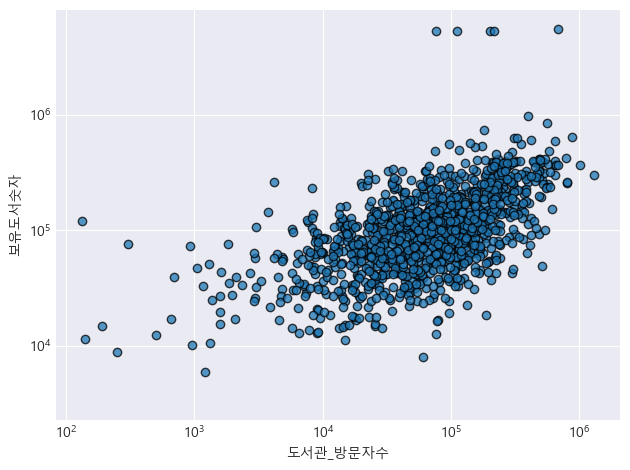

In [378]:
도서관_방문자수 = p21['도서관_방문자수']
도서총합 = p21['도서총합']
 
 
plt.scatter(도서관_방문자수,도서총합,edgecolor = 'black', linewidth = 1,alpha=0.75)
 
plt.xlabel('도서관_방문자수')
plt.ylabel('보유도서숫자')
 
plt.xscale('log')
plt.yscale('log')
 
plt.tight_layout()
plt.show()


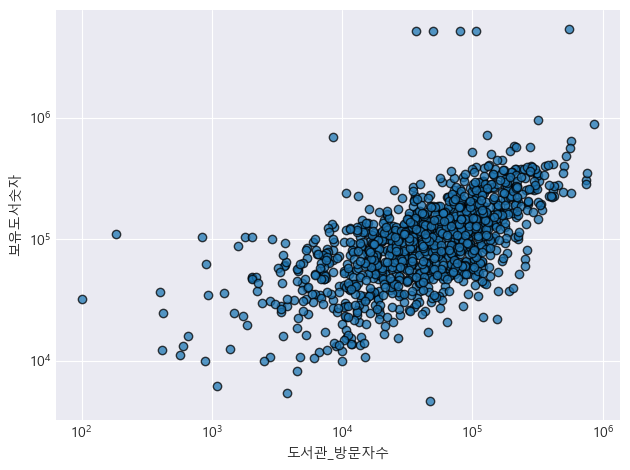

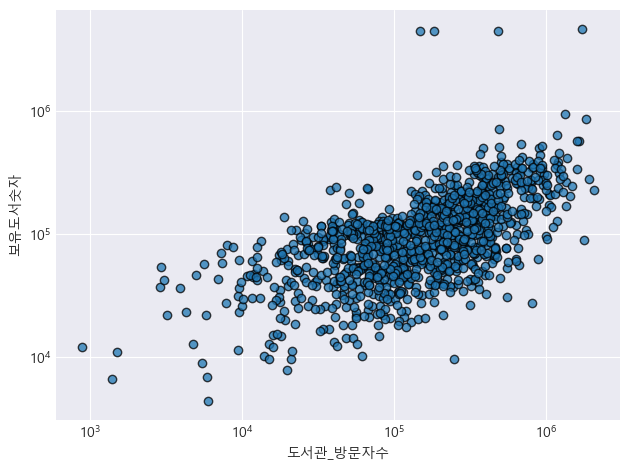

In [379]:
#근거보충용 자료 19, 17년도 데이터
도서관_방문자수_20 = p20['도서관_방문자수']
도서총합_20 = p20['도서총합']
 
 
plt.scatter(도서관_방문자수_20,도서총합_20,edgecolor = 'black', linewidth = 1,alpha=0.75)
 
plt.xlabel('도서관_방문자수')
plt.ylabel('보유도서숫자')
 
plt.xscale('log')
plt.yscale('log')
 
plt.tight_layout()
plt.show()

도서관_방문자수_19 = p19['도서관_방문자수']
도서총합_19 = p19['도서총합']
 
 
plt.scatter(도서관_방문자수_19,도서총합_19,edgecolor = 'black', linewidth = 1,alpha=0.75)
 
plt.xlabel('도서관_방문자수')
plt.ylabel('보유도서숫자')
 
plt.xscale('log')
plt.yscale('log')
 
plt.tight_layout()
plt.show()


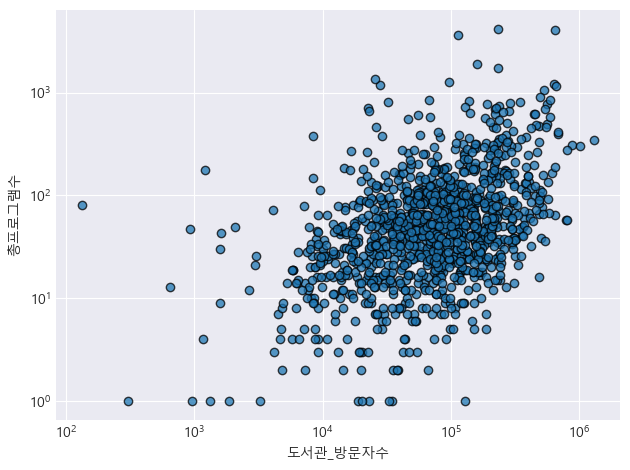

In [380]:
#로그화시킨 산점도로 데이터 시각화
도서관_방문자수 = p21['도서관_방문자수']
총프로그램수 = p21['총프로그램수']
 
 
plt.scatter(도서관_방문자수,총프로그램수,edgecolor = 'black', linewidth = 1,alpha=0.75)
 
plt.xlabel('도서관_방문자수')
plt.ylabel('총프로그램수')
 
plt.xscale('log')
plt.yscale('log')
 
plt.tight_layout()
plt.show()

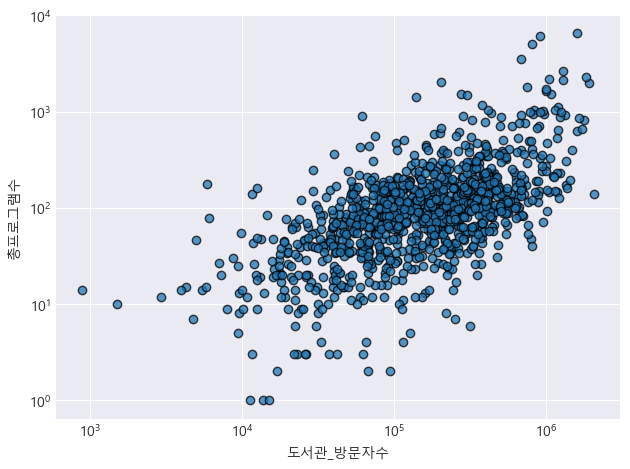

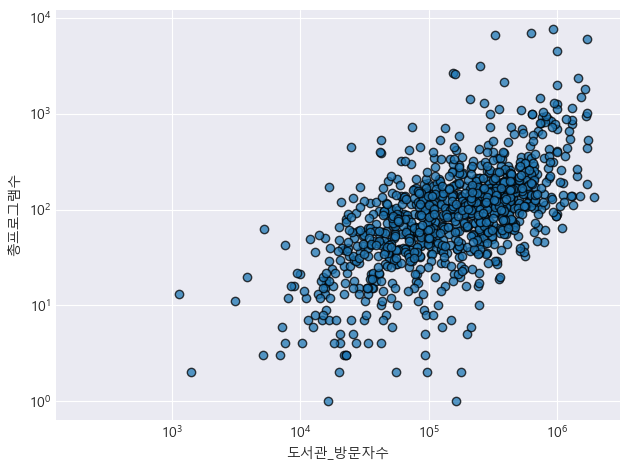

In [381]:
#근거보충용 19, 17년도 산점도
도서관_방문자수_19 = p19['도서관_방문자수']
총프로그램수_19 = p19['총프로그램수']
 
 
plt.scatter(도서관_방문자수_19,총프로그램수_19,edgecolor = 'black', linewidth = 1,alpha=0.75)
 
plt.xlabel('도서관_방문자수')
plt.ylabel('총프로그램수')
 
plt.xscale('log')
plt.yscale('log')
 
plt.tight_layout()
plt.show()


도서관_방문자수_17 = p17['도서관_방문자수']
총프로그램수_17 = p17['총프로그램수']
 
 
plt.scatter(도서관_방문자수_17,총프로그램수_17,edgecolor = 'black', linewidth = 1,alpha=0.75)
 
plt.xlabel('도서관_방문자수')
plt.ylabel('총프로그램수')
 
plt.xscale('log')
plt.yscale('log')
 
plt.tight_layout()
plt.show()


=>2021년과 마찬가지로 프로그램수, 도서보유수와 방문자 수는 대략적으로 비례하다는 점을 확인

### 3.연도별 전자자료 보유 수,

In [445]:
##3.연도별 전자자료 보유 수,
eb21=p21[['전자자료_전자저널','전자자료_전자도서','전자자료_오디오북','전자자료_기타']]
eb20=p20[['전자자료_전자저널','전자자료_전자도서','전자자료_오디오북','전자자료_기타']]
eb19=p19[['전자자료_전자저널','전자자료_전자도서','전자자료_기타']]
eb18=p18[['전자자료_전자저널','전자자료_전자도서','전자자료_기타']]
eb17=p17[['전자자료_전자저널','전자자료_전자도서','전자자료_기타']]

In [446]:
#연도별, 분야별 전자자료 보유 수
peb21=eb21.sum()
peb20=eb20.sum()
peb19=eb19.sum()
peb18=eb18.sum()
peb17=eb17.sum()

In [447]:
#연도별 전자자료 보유 수 총합
ppeb21=peb21.sum()
ppeb20=peb20.sum()
ppeb19=peb19.sum()
ppeb18=peb18.sum()
ppeb17=peb17.sum()

In [449]:
#정수화
ppeb21=ppeb21.astype(int)
ppeb20=ppeb20.astype(int)
ppeb19=ppeb19.astype(int)
ppeb18=ppeb18.astype(int)
ppeb17=ppeb17.astype(int)

In [412]:
#전자책제외도서
neb21=p21[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','연속간행물_국내','연속간행물_국외']]
neb20=p20[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','연속간행물_국내','연속간행물_국외']]
neb19=p19[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','연속간행물_국내','연속간행물_국외']]
neb18=p18[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','연속간행물_국내','연속간행물_국외']]
neb17=p17[['도서_국내_총류','도서_국내_철학','도서_국내_종교','도서_국내_사회과학','도서_국내_순수과학','도서_국내_기술과학','도서_국내_예술','도서_국내_언어','도서_국내_문학','도서_국내_역사','도서_국외_총류','도서_국외_철학','도서_국외_종교','도서_국외_사회과학','도서_국외_순수과학','도서_국외_기술과학','도서_국외_예술','도서_국외_언어','도서_국외_문학','도서_국외_역사','지역_지역자료','지역_기타','비도서_시청각자료','비도서_기타','연속간행물_국내','연속간행물_국외']]

In [414]:
neb21=neb21.sum().sum()
neb20=neb20.sum().sum()
neb19=neb19.sum().sum()
neb18=neb18.sum().sum()
neb17=neb17.sum().sum()

In [426]:
neb21=neb21.astype(int)
neb20=neb20.astype(int)
neb19=neb19.astype(int)
neb18=neb18.astype(int)
neb17=neb17.astype(int)

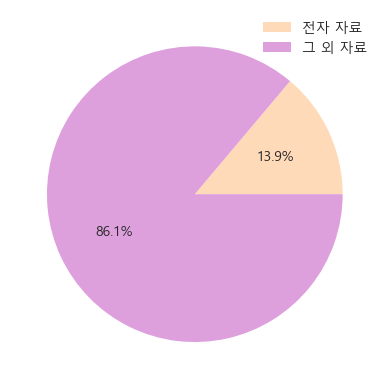

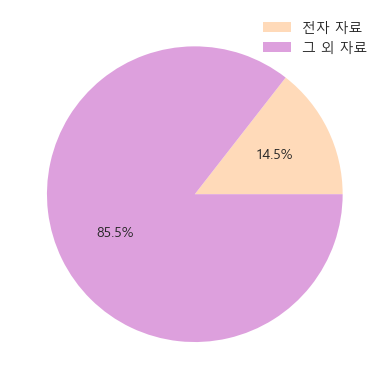

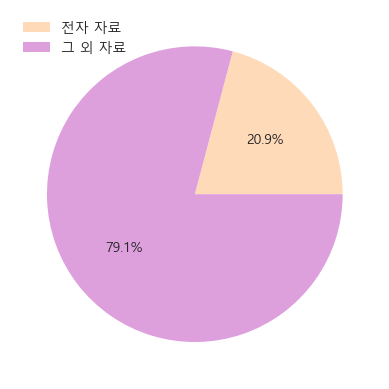

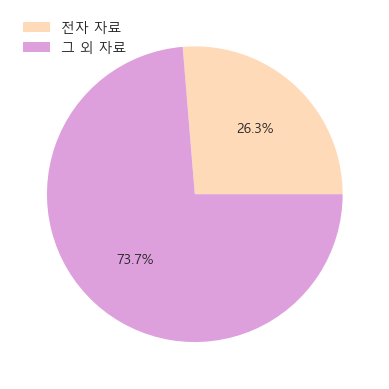

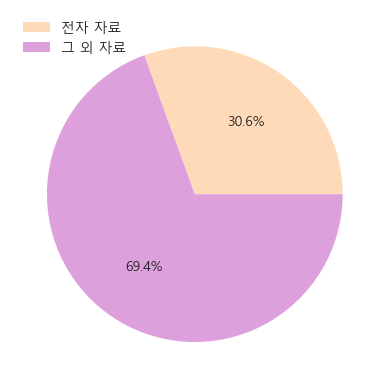

In [469]:
plt.pie([ppeb17,neb17],colors=['peachpuff','plum'],autopct='%0.1f%%')
plt.legend(['전자 자료','그 외 자료'])
plt.show()
plt.pie([ppeb18,neb18],colors=['peachpuff','plum'],autopct='%0.1f%%')
plt.legend(['전자 자료','그 외 자료'])
plt.show()
plt.pie([ppeb19,neb20],colors=['peachpuff','plum'],autopct='%0.1f%%')
plt.legend(['전자 자료','그 외 자료'])
plt.show()
plt.pie([ppeb20,neb20],colors=['peachpuff','plum'],autopct='%0.1f%%')
plt.legend(['전자 자료','그 외 자료'])
plt.show()
plt.pie([ppeb21,neb21],colors=['peachpuff','plum'],autopct='%0.1f%%')
plt.legend(['전자 자료','그 외 자료'])
plt.show()

#시간이 흐를수록 전체 자료 중 전자 자료에 대한 비중이 높아지고 있음

### 3.도서관 예산사용내역 분석

In [393]:
bgt21=p21[['결산_인건비_금액(천원)','결산_자료구입비_금액(천원)','결산_운영비_금액(천원)']]
bgt20=p20[['결산_인건비_금액(천원)','결산_자료구입비_금액(천원)','결산_운영비_금액(천원)']]
bgt19=p19[['결산_인건비_금액(천원)','결산_자료구입비_금액(천원)','결산_운영비_금액(천원)']]
bgt18=p18[['결산_인건비_금액(천원)','결산_자료구입비_금액(천원)','결산_운영비_금액(천원)']]
bgt17=p17[['결산_인건비_금액(천원)','결산_자료구입비_금액(천원)','결산_운영비_금액(천원)']]

In [400]:
bgt21=bgt21.sum()
bgt20=bgt20.sum()
bgt19=bgt19.sum()
bgt18=bgt18.sum()
bgt17=bgt17.sum()

In [402]:
bgt17

결산_인건비_금액(천원)      496887038.0
결산_자료구입비_금액(천원)     98526376.0
결산_운영비_금액(천원)      400170599.0
dtype: float64

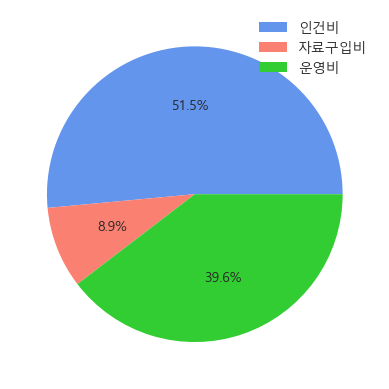

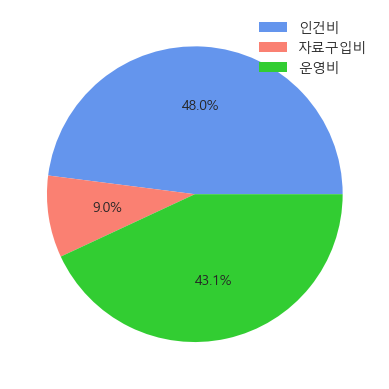

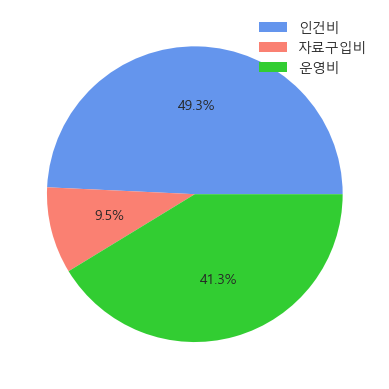

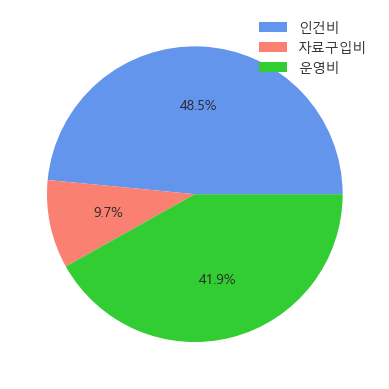

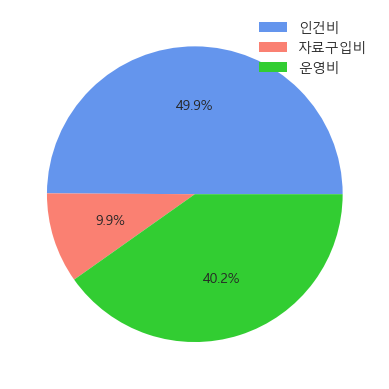

In [411]:
#21년 예산비율
plt.pie(bgt21,colors=['cornflowerblue','salmon','limegreen'],autopct='%0.1f%%') #퍼센테이지 표기 추가
plt.legend(['인건비','자료구입비','운영비'])
plt.show()
#20년예산비율
plt.pie(bgt20,colors=['cornflowerblue','salmon','limegreen'],autopct='%0.1f%%')
plt.legend(['인건비','자료구입비','운영비'])
plt.show()
#19년예산비율
plt.pie(bgt19,colors=['cornflowerblue','salmon','limegreen'],autopct='%0.1f%%')
plt.legend(['인건비','자료구입비','운영비'])
plt.show()
#18년예산비율
plt.pie(bgt18,colors=['cornflowerblue','salmon','limegreen'],autopct='%0.1f%%')
plt.legend(['인건비','자료구입비','운영비'])
plt.show()
#17년예산비율
plt.pie(bgt17,colors=['cornflowerblue','salmon','limegreen'],autopct='%0.1f%%')
plt.legend(['인건비','자료구입비','운영비'])
plt.show()

In [508]:
#총예산 증감
tbgt21=p21[['도서관총예산']].sum()
tbgt20=p20[['도서관총예산']].sum()
tbgt19=p19[['도서관총예산']].sum()
tbgt18=p18[['도서관총예산']].sum()
tbgt17=p17[['도서관총예산']].sum()

In [509]:
abc=pd.concat([bgt17,bgt18,bgt19,bgt20,bgt21],axis=1)

In [510]:
abc.columns=['2017년','2018년','2019년','2020년','2021년']

In [519]:
abc2=abc.transpose()

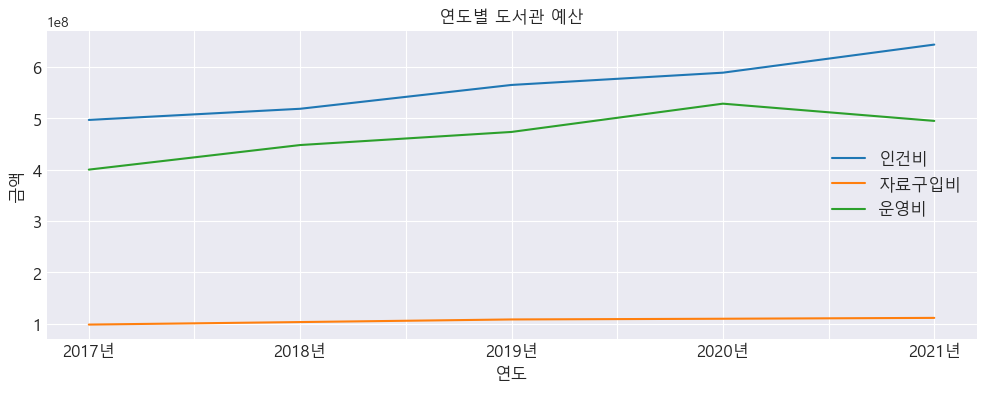

In [521]:
ax = abc2.plot(kind='line', title='연도별 도서관 예산', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('연도', fontsize=12)   #x축
ax.set_ylabel('금액', fontsize=12)   #y축
ax.legend(['인건비','자료구입비','운영비'], fontsize=12)   #범례